In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
creditcard_data=pd.read_csv(r'/Users/jacquelin/Documents/python/MachineLearning-imooc-master/机器学习项目实战/逻辑回归-信用卡欺诈检测/逻辑回归-信用卡欺诈检测/creditcard.csv')
data=creditcard_data.copy()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

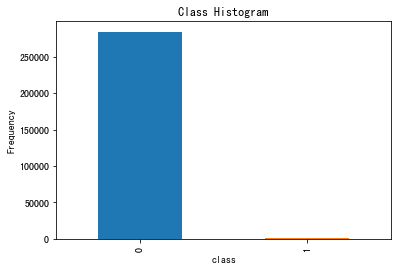

In [12]:
count_classes=pd.value_counts(data['Class'],sort=True).sort_index()
count_classes.plot('bar')
plt.title('Class Histogram')
plt.xlabel('class')
plt.ylabel('Frequency')
count_classes

In [3]:
#数据归一化
from sklearn.preprocessing import StandardScaler
data['normalAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data=data.drop(['Amount','Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
#样本两个类别极其不均衡，降采样
#欺诈样本提取
fraud_count=len(data[data['Class']==1])
fraud_index=np.array(data[data['Class']==1].index)
#正常样本提取及降采
normal_index=data[data['Class']==0].index
random_normal_index=np.random.choice(normal_index,fraud_count,replace=False)
random_normal_index=np.array(random_normal_index)
#两部分样本纵向合并
under_sample_index=np.concatenate([fraud_index,random_normal_index])
#根据index提取数据
under_sample_data=data.iloc[under_sample_index,:]
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']
print('normal percent',len(under_sample_data[under_sample_data['Class']==0])/len(under_sample_data))
print('total amount',len(under_sample_data))

normal percent 0.5
total amount 984


# 降采样训练模型

In [50]:
#分离训练集，准备交叉验证
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(X_undersample,
                                                                                              y_undersample,
                                                                                              test_size=0.3,
                                                                                              random_state=0)


In [51]:
#训练模型
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

def train_model(X_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)     #将原训练集拆为5部分
    c_param_range=[0.01,0.1,1,10,100]         #正则化时C参数，调节theta系数，避免过拟合行为
    
    result=pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean_recall_score'])
    result['C_parameter']=c_param_range      #要打印出的分析结果表格
    
    j=0
    for c_param in c_param_range:
        print('--------------------------------------------------')
        print('c_parameter',c_param)
        print('--------------------------------------------------')
        recall_accs=[]     #召回率收集
        for iteration,indices in enumerate(fold,start=1):
            log_clf=LogisticRegression(C=c_param,penalty='l1')
            log_clf.fit(X_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_predict_undersample=log_clf.predict(X_train_data.iloc[indices[1],:].values)
            
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_predict_undersample)
            recall_accs.append(recall_acc)
            print('Iteration',iteration,':recall_score=',recall_acc)
            
        result.ix[j,'Mean_recall_score']=np.mean(recall_accs)
        j+=1

        print('Mean_recall_score',np.mean(recall_accs))
    
    best_c=result.loc[result['Mean_recall_score'].astype('float64').idxmax()]['C_parameter']
    #result[list(np.argsort(np.array(result['Mean_recall_score'])))[-1],:]
    
    print('')
    print('best_c',best_c)
    print('')
    return best_c
    

In [52]:
best_c=train_model(X_train_undersample,y_train_undersample)

--------------------------------------------------
c_parameter 0.01
--------------------------------------------------
Iteration 1 :recall_score= 0.958904109589041
Iteration 2 :recall_score= 0.958904109589041
Iteration 3 :recall_score= 1.0
Iteration 4 :recall_score= 0.972972972972973
Iteration 5 :recall_score= 0.9848484848484849
Mean_recall_score 0.9751259353999078
--------------------------------------------------
c_parameter 0.1
--------------------------------------------------
Iteration 1 :recall_score= 0.8493150684931506
Iteration 2 :recall_score= 0.863013698630137
Iteration 3 :recall_score= 0.9491525423728814
Iteration 4 :recall_score= 0.9459459459459459
Iteration 5 :recall_score= 0.9090909090909091
Mean_recall_score 0.9033036329066049
--------------------------------------------------
c_parameter 1
--------------------------------------------------
Iteration 1 :recall_score= 0.863013698630137
Iteration 2 :recall_score= 0.8767123287671232
Iteration 3 :recall_score= 0.983050847457

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration 1 :recall_score= 0.863013698630137
Iteration 2 :recall_score= 0.8767123287671232
Iteration 3 :recall_score= 0.9830508474576272
Iteration 4 :recall_score= 0.9459459459459459
Iteration 5 :recall_score= 0.9090909090909091
Mean_recall_score 0.9155627459783485

best_c 0.01



In [64]:
#画混淆矩阵
import itertools
def confusion_matrix_plot(cm,
                         classes,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],            #这里一定要注意顺序，找了好大一会，哭泣~~
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

recall: 0.9319727891156463


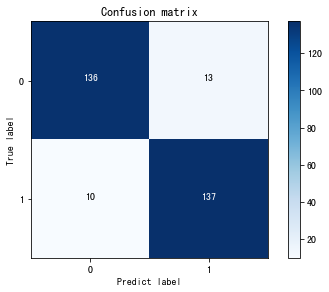

array([[136,  13],
       [ 10, 137]])

In [65]:
#提取及计算
#拟合模型
log_clf2=LogisticRegression(C=best_c,penalty='l1')
log_clf2.fit(X_train_undersample,y_train_undersample.values.ravel())
y_predict_undersample=log_clf2.predict(X_test_undersample.values)
#混淆矩阵数据

cnf_matrix = confusion_matrix(y_test_undersample,y_predict_undersample)
np.set_printoptions(precision=2)      #设置输出样式：精度为2

#输出召回率
print('recall:',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#绘制混淆矩阵
class_name=[0,1]
plt.figure()
confusion_matrix_plot(cnf_matrix,
                     classes=class_name,
                     title='Confusion matrix')
plt.show()
cnf_matrix

recall: 0.9319727891156463


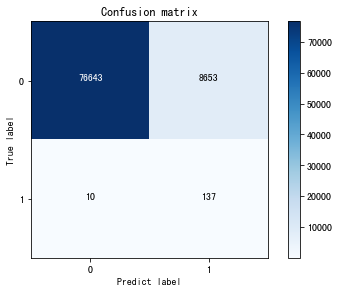

In [66]:
#对整个样本数据的测试集进行预测
y_predict=log_clf2.predict(X_test.values)
cnf_matrix2=confusion_matrix(y_test,y_predict)
np.set_printoptions(precision=2)
print('recall:',cnf_matrix2[1,1]/(cnf_matrix2[1,0]+cnf_matrix2[1,1]))
confusion_matrix_plot(cnf_matrix2,
                     classes=class_name,
                     title='Confusion matrix')
plt.show()

#会出现许多真实值为0的预测成了1，需要调参

recall: 1.0
recall: 1.0
recall: 1.0
recall: 0.9931972789115646
recall: 0.9319727891156463
recall: 0.8843537414965986
recall: 0.8435374149659864
recall: 0.7346938775510204
recall: 0.5782312925170068


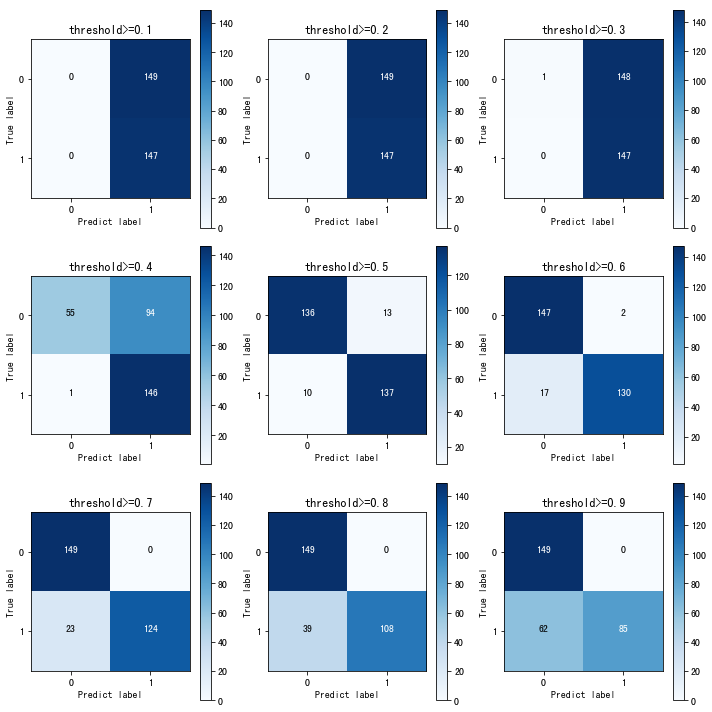

In [67]:
#调阈值
log_clf3 = LogisticRegression(C = 0.01, penalty = 'l1')
log_clf3.fit(X_train_undersample,y_train_undersample.values.ravel())
y_predict_undersample_proba=log_clf3.predict_proba(X_test_undersample.values)

thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#绘制多个子图表示不同阈值带来的召回率影响
plt.figure(figsize=(10,10))
j=1
for threshold in thresholds:
    y_test_predict_high_recall=y_predict_undersample_proba[:,1]>threshold    #bool型
    plt.subplot(3,3,j)   #画在第几个字图里
    j+=1
    cnf_matrix=confusion_matrix(y_test_undersample,y_test_predict_high_recall)
    np.set_printoptions(precision=2)
    print('recall:',cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    class_name=[0,1]
    confusion_matrix_plot(cnf_matrix,
                     classes=class_name,
                     title='threshold>=%s'%threshold)

#阈值太小，把大部分大于此阈值的数据归为异常，太严格了，阈值大一些，容易漏失一些原本就是异常的数据
#阈值小，召回率会很高，基本上为异常的数据全预测为异常了，故而召回率高，阈值太大，原本为异常的数据预测成了正常
#具体要用哪些参数视需求而定，误差率？召回率？精准率？

# 升采样训练模型

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [77]:


columns=creditcard_data.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=creditcard_data[features_columns]
labels=creditcard_data['Class']

In [78]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [83]:
oversample=SMOTE(random_state=0)
os_feature,os_label=oversample.fit_sample(features_train,labels_train)
len(os_label[os_label==1])
#可以fit出来一般多的异常样本

227454

In [84]:
os_feature = pd.DataFrame(os_feature)
os_label= pd.DataFrame(os_label)
best_c = train_model(os_feature,os_label)

--------------------------------------------------
c_parameter 0.01
--------------------------------------------------
Iteration 1 :recall_score= 0.8903225806451613
Iteration 2 :recall_score= 0.8947368421052632
Iteration 3 :recall_score= 0.968861347792409
Iteration 4 :recall_score= 0.9578043767380002
Iteration 5 :recall_score= 0.958408898561238
Mean_recall_score 0.9340268091684143
--------------------------------------------------
c_parameter 0.1
--------------------------------------------------


/Users/jacquelin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration 1 :recall_score= 0.8903225806451613
Iteration 2 :recall_score= 0.8947368421052632
Iteration 3 :recall_score= 0.9703441407546752
Iteration 4 :recall_score= 0.95989272485464
Iteration 5 :recall_score= 0.9600246205251646
Mean_recall_score 0.9350641817769809
--------------------------------------------------
c_parameter 1
--------------------------------------------------
Iteration 1 :recall_score= 0.8903225806451613
Iteration 2 :recall_score= 0.8947368421052632
Iteration 3 :recall_score= 0.9705433218988603
Iteration 4 :recall_score= 0.9600905683604269
Iteration 5 :recall_score= 0.9604862553720007
Mean_recall_score 0.9352359136763424
--------------------------------------------------
c_parameter 10
--------------------------------------------------
Iteration 1 :recall_score= 0.8903225806451613
Iteration 2 :recall_score= 0.8947368421052632
Iteration 3 :recall_score= 0.9705433218988603
Iteration 4 :recall_score= 0.9602774205603368
Iteration 5 :recall_score= 0.9567162374561722
Mean_

Recall metric in the testing dataset:  0.9108910891089109


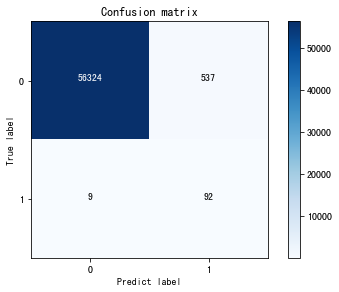

In [87]:
log_clf4= LogisticRegression(C = best_c, penalty = 'l1')
log_clf4.fit(os_feature,os_label.values.ravel())
y_pred = log_clf4.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
confusion_matrix_plot(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
#升采样用了所有的数据，误杀的小很多，根据需求衡定哪种训练方式好
#升采样跑数据比较慢